In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-bau.nc")

def plot_generators_pmaxpu(n, carrier=None, year=None, node=None, start_week=None, end_week=None, max_xticks=10):
    """
    Plot p_max_pu for generators filtered by carrier, year, node/country, and snapshot range,
    with improved x-axis formatting.
    
    Parameters:
    - n: PyPSA network
    - carrier: str, optional, generator carrier (e.g., "solar", "hydro")
    - year: int, optional, year to filter generator names (e.g., 2023)
    - node: str, optional, substring to match in generator names (e.g., "IDNSM")
    - start_week: int, optional, starting week of the year (1-based)
    - end_week: int, optional, ending week of the year
    - max_xticks: int, optional, maximum number of x-axis ticks to show
    """
    # Filter generators by carrier
    gens = n.generators.index
    if carrier is not None:
        gens = gens[n.generators.loc[gens, "carrier"] == carrier]
    if node is not None:
        gens = [g for g in gens if node in g]
    
    # Filter generators by year in name
    if year is not None:
        gens = [g for g in gens if str(year) in g]

    # Extract generator time series
    df = n.generators_t.p_max_pu[gens]
    
    # Filter snapshots by period if MultiIndex
    if year is not None and isinstance(df.index, pd.MultiIndex):
        df = df.loc[df.index.get_level_values(0) == str(year)]
    
    # Filter by start_week and end_week
    if start_week is not None or end_week is not None:
        hours_per_week = 7 * 12  # 2-hourly snapshots
        start_idx = (start_week - 1) * hours_per_week if start_week is not None else 0
        end_idx = end_week * hours_per_week if end_week is not None else len(df)
        df = df.iloc[start_idx:end_idx]
    
    # Loop and plot each generator
    for gen_name in df.columns:
        plt.figure(figsize=(12, 4))
        df[gen_name].plot()
        
        # Format x-axis
        ax = plt.gca()
        timestamps = df.index.get_level_values(1) if isinstance(df.index, pd.MultiIndex) else df.index
        
        # Evenly spaced ticks
        num_snapshots = len(timestamps)
        step = max(1, num_snapshots // max_xticks)
        xticks = range(0, num_snapshots, step)
        ax.set_xticks(xticks)
        ax.set_xticklabels([
            ts.strftime("%Y/%m/%d %I%p").lstrip("0").lower() for ts in timestamps[::step]
        ], rotation=45, ha='right')
        
        # Labels and grid
        plt.title(f"{gen_name} – {carrier if carrier else 'all'} p_max_pu profile ({year})")
        plt.xlabel("Time")
        plt.ylabel("p_max_pu (per unit)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        

INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


In [2]:
print(n.generators.carrier.unique())
print(n.buses.index.tolist())

['biomass' 'gas' 'coal' 'oil' 'geothermal' 'hydro' 'solar' 'bioenergy'
 'off-wind' 'on-wind' 'backstop']
['IDNSM', 'IDNJW', 'IDNNU', 'IDNKA', 'IDNSL', 'IDNML', 'IDNPP', 'MYSPE', 'MYSSK', 'MYSSH', 'PHLLU', 'PHLVI', 'PHLMI', 'SGPXX', 'BRNXX', 'MMRXX', 'THANO', 'THASO', 'THACE', 'VNMNO', 'VNMCE', 'VNMSO', 'KHMXX', 'LAOXX']


In [3]:
n.generators_t.p_max_pu.head()

Generator                   IDNSM-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                            0.8658   
       2023-01-01 02:00:00                            0.8658   
       2023-01-01 04:00:00                            0.8658   
       2023-01-01 06:00:00                            0.8658   
       2023-01-01 08:00:00                            0.8658   

Generator                   IDNNU-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                            0.8658   
       2023-01-01 02:00:00                            0.8658   
       2023-01-01 04:00:00                            0.8658   
       2023-01-01 06:00:00                            0.8658   
       2023-01-01 08:00:00                            0.8658   

Generator                   IDNJW-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                            0.8658   
       2023-01-01 02:00:00                            0.8658   
       2023-01-01 04:00:00                            0.8658   
       2023-01-01 06:00:00                            0.8658   
       2023-01-01 08:00:00                            0.8658   

Generator                   IDNSL-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                            0.8658   
       2023-01-01 02:00:00                            0.8658   
       2023-01-01 04:00:00                            0.8658   
       2023-01-01 06:00:00                            0.8658   
       2023-01-01 08:00:00                            0.8658   

Generator                   IDNKA-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                            0.8658   
       2023-01-01 02:00:00                            0.8658   
       2023-01-01 04:00:00                            0.8658   
       2023-01-01 06:00:00                            0.8658   
       2023-01-01 08:00:00                            0.8658   

Generator                   IDNML-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                            0.8658   
       2023-01-01 02:00:00                            0.8658   
       2023-01-01 04:00:00                            0.8658   
       2023-01-01 06:00:00                            0.8658   
       2023-01-01 08:00:00                            0.8658   

Generator                   IDNPP-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                            0.8658   
       2023-01-01 02:00:00                            0.8658   
       2023-01-01 04:00:00                            0.8658   
       2023-01-01 06:00:00                            0.8658   
       2023-01-01 08:00:00                            0.8658   

Generator                   VNMNO-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                             0.342   
       2023-01-01 02:00:00                             0.342   
       2023-01-01 04:00:00                             0.342   
       2023-01-01 06:00:00                             0.342   
       2023-01-01 08:00:00                             0.342   

Generator                   VNMCE-hydro-unspecified-ext-2023  \
period timestep                                                
2023   2023-01-01 00:00:00                            0.3492   
       2023-01-01 02:00:00                            0.3492   
       2023-01-01 04:00:00                            0.3492   
       2023-01-01 06:00:00                            0.3492   
       2023-01-01 08:00:

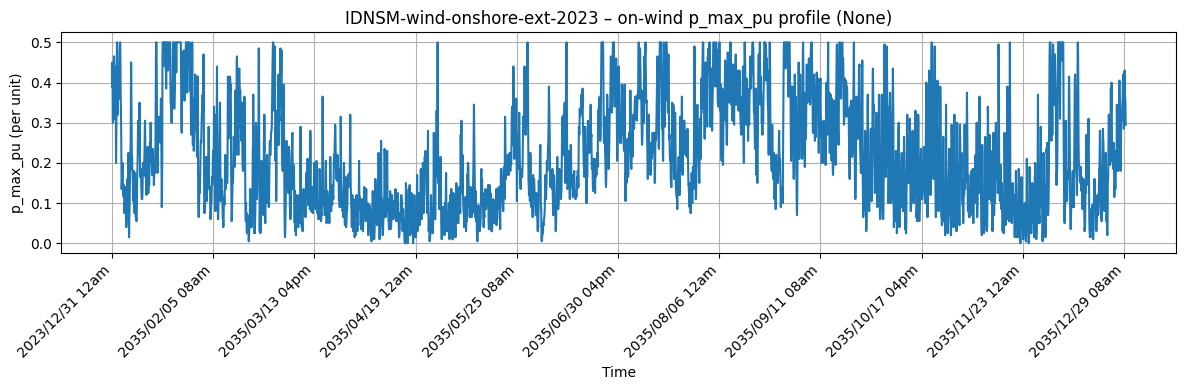

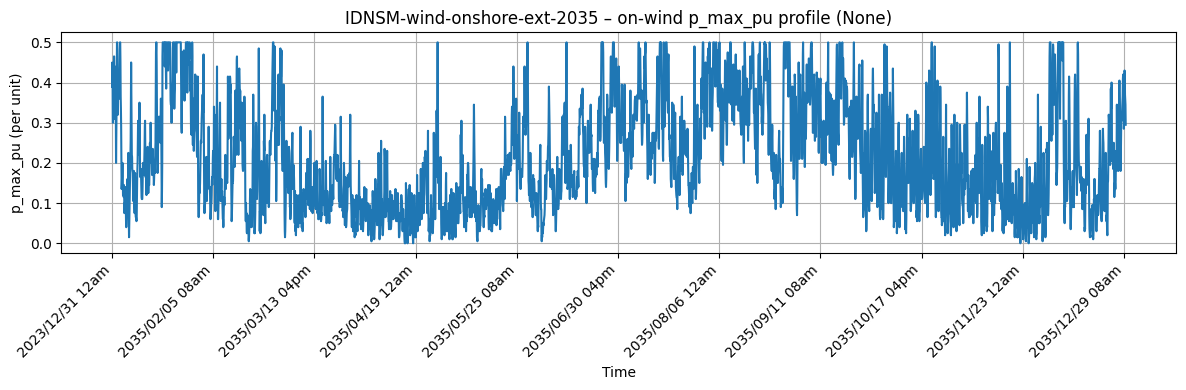

In [4]:
plot_generators_pmaxpu(n, carrier="on-wind", node="IDNSM", start_week=53, end_week=104, max_xticks=10)

In [5]:
# # Loop through all generator names (columns)
# for gen_name in n.generators_t.p_max_pu.columns:
#     plt.figure(figsize=(10, 4))
#     n.generators_t.p_max_pu[gen_name].plot()
    
#     plt.title(f"{gen_name} – p_max_pu profile")
#     plt.xlabel("Time")
#     plt.ylabel("p_max_pu (per unit)")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()